In [1]:
#Lets import some librariers
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#Now open the all datasets
cab_data = pd.read_csv(r'C:\Users\casper\Desktop\DataSets\Cab_data.csv')
city_data = pd.read_csv(r'C:\Users\casper\Desktop\DataSets\City.csv')
customer_data = pd.read_csv(r'C:\Users\casper\Desktop\DataSets\Customer_ID.csv')
transaction_data = pd.read_csv(r'C:\Users\casper\Desktop\DataSets\Transaction_ID.csv')

# We need to change type of Date format in cab data
date_travel = cab_data['Date of Travel'].to_list()
our_base_date = pd.Timestamp('1899-12-29')
dates = [our_base_date + pd.DateOffset(date_offset) for date_offset in date_travel]
cab_data['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

# We need to change data type of Population into integer
city_data['Population'] = [i.replace(',','') for i in city_data['Population']]
city_data['Population'] = city_data['Population'].astype(float)

# We need to change data type of users into integer
city_data['Users'] = [i.replace(',','') for i in city_data['Users']]
city_data['Users'] = city_data['Users'].astype(float)

#We saw our datasets, types of data, understand the what kind of information it has
#Now, we should romove dublicates and reorganize the dataset
cab_data = cab_data.drop_duplicates(keep="first")
cab_data.info()
cab_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 21.9+ MB


,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [2]:
city_data = city_data.drop_duplicates(keep="first")
# remove duplicates
customer_data = customer_data.drop_duplicates(keep="first")
# returns True where data is missing in the table, otherwise False
miss_transaction_data = transaction_data.isnull()
# remove duplicates
transaction_data = transaction_data.drop_duplicates(keep="first")


In [3]:
#We opened the dataset, understand what kind of information they have
#Now we combine all of the information by merging them
merged_data= cab_data.merge(transaction_data, on= 'Transaction ID').merge(customer_data, on ='Customer ID').merge(city_data, on = 'City')


In [4]:
merged_data.info()
merged_data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Customer ID         359392 non-null  int64         
 8   Payment_Mode        359392 non-null  object        
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
 12  Population          359392 non-null  float64       
 13  Users               359392 no

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0


<AxesSubplot:title={'center':'Total Transaction by Gender'}, xlabel='Company', ylabel='count'>

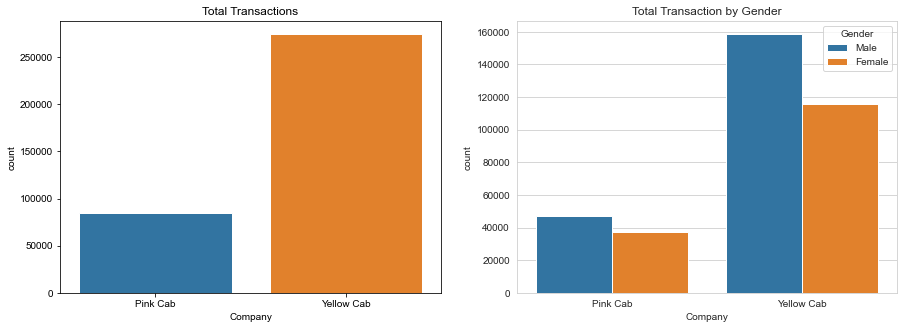

In [5]:
#Now let's explore some statistics
# First question: Is there a specific gender type that chose specific company? Let's explore ... :)
#Which company has more transaction?
f = plt.figure(figsize=(15, 5))

f.add_subplot(1,2,1)
plt.title("Total Transactions")
sns.set_style("whitegrid")
sns.countplot(x="Company", data=merged_data)

f.add_subplot(1,2,2)
plt.title("Total Transaction by Gender")
sns.set_style("whitegrid")
sns.countplot(x="Company", hue="Gender", data=merged_data, orient="h")

<AxesSubplot:title={'center':'Company Choice by location'}, xlabel='Company', ylabel='count'>

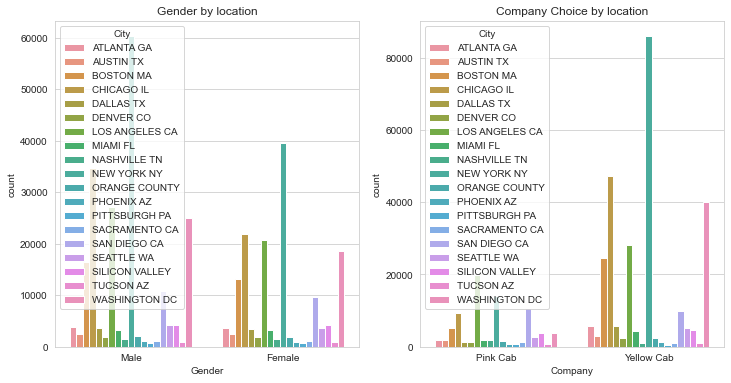

In [6]:
#Second question: What is the relationship between gender and location. What is te statistics on gender based on location?
#Let's classify further that in which city, which company is chosen by people?# location of genders
second_figure = plt.figure(figsize=(12,6))
second_figure.add_subplot(1,2,1)
plt.title("Gender by location")
sns.set_style("whitegrid")
sns.countplot(x="Gender", hue="City", data=merged_data)



second_figure.add_subplot(1,2,2)
plt.title("Company Choice by location")
sns.set_style("whitegrid")
sns.countplot(x="Company", hue="City", data=merged_data)

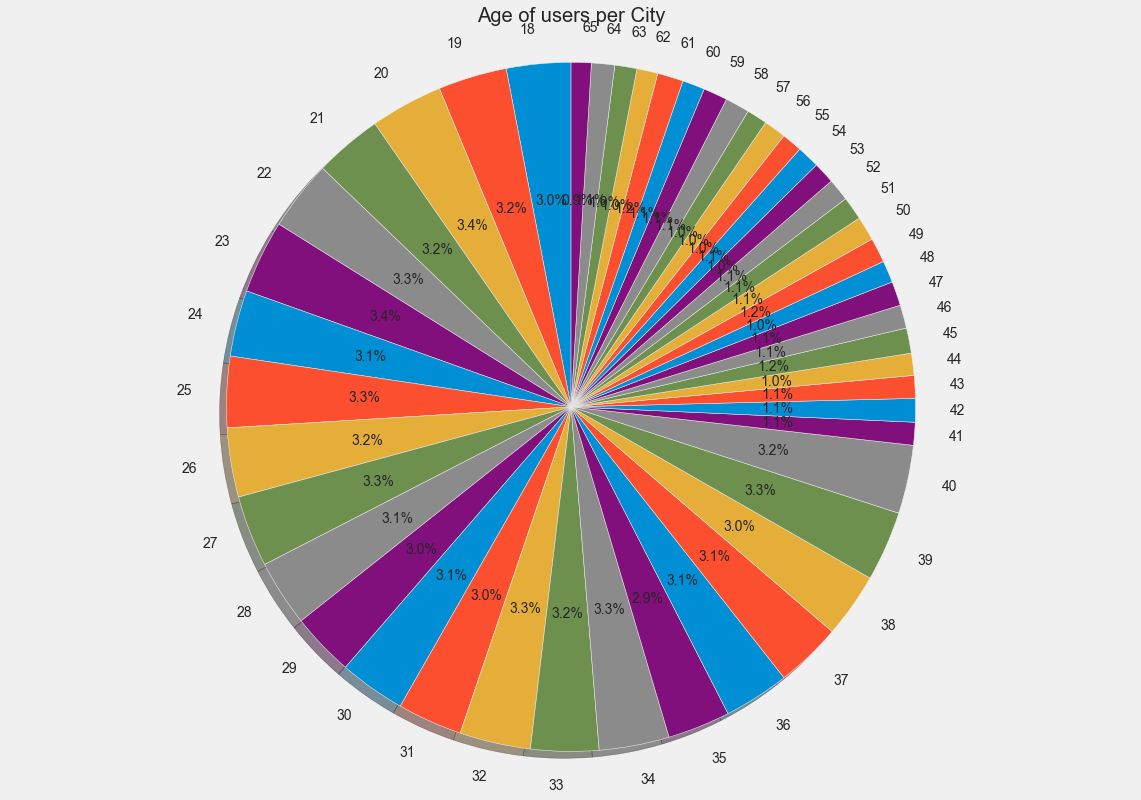

In [7]:
# What is age of users per city.
age_of_users = merged_data.groupby('Age')
age_of_users = age_of_users.Users.count()
labs = age_of_users.index
vals = age_of_users.values

plt.style.use('fivethirtyeight')
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Age of users per City')
plt.show()

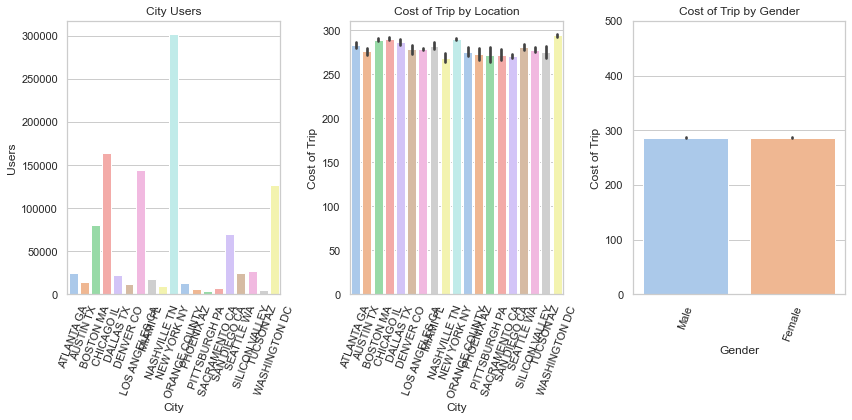

In [22]:
#which city has more users?
#Which cist has the most cost according to trip made by users?
#Is there a difference between male and female about paying to the trip. You expect that woman pay more, right ?.... :=)
figure3 = plt.figure(figsize=(12,6))

figure3.add_subplot(1,3,1)
plt.title("City Users")
sns.set_style("whitegrid")
sns.barplot(x="City", y="Users", data=merged_data, palette="pastel")
plt.xticks(rotation=70)

figure3.add_subplot(1,3,2)
plt.title("Cost of Trip by Location")
sns.set_style("whitegrid")
sns.barplot(x="City", y="Cost of Trip", data=merged_data, palette="pastel")
plt.xticks(rotation=70)


figure3.add_subplot(1,3,3)
plt.title("Cost of Trip by Gender")
sns.set_style("whitegrid")
sns.barplot(x="Gender", y="Cost of Trip", data=merged_data, palette="pastel")
plt.xticks(rotation=70)
plt.ylim(0,500)


figure3.tight_layout()

(0.0, 50.0)

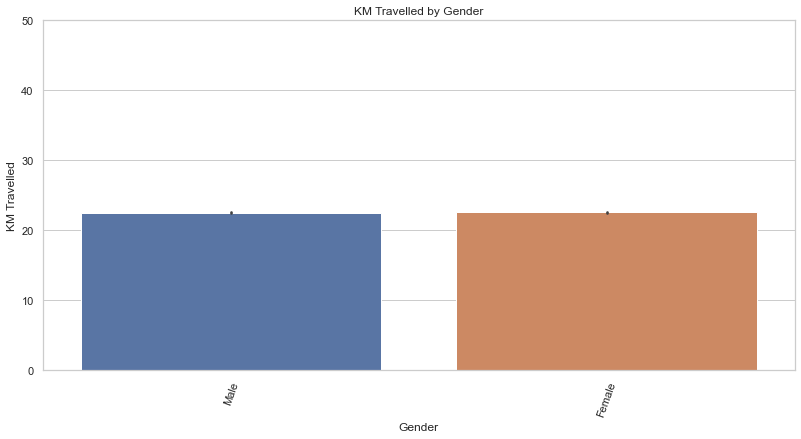

In [23]:
#Who travelled more? Women or Men? 

last_figure=plt.figure(figsize=(12,6))
plt.title("KM Travelled by Gender")
sns.set_style("whitegrid")
sns.barplot(x="Gender", y="KM Travelled", data=merged_data)
plt.xticks(rotation=70)
plt.ylim(0,50)